In [1]:
import numpy as np # for mathematical operations
import pandas as pd # for data manipulation and analysis
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
dt = pd.read_csv('Titanic.csv')

In [3]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking the shape of the dataset
dt.shape

(891, 12)

In [5]:
# checking the datatypes
dt.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Statstical Analysis
dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#checking the null values.
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:

dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# droping the null values and reset the index
dt[dt['Age'].isna()]
dt=dt.dropna()
dt=dt.reset_index(drop=True)

In [10]:
# checking the null values after droping the null values
dt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

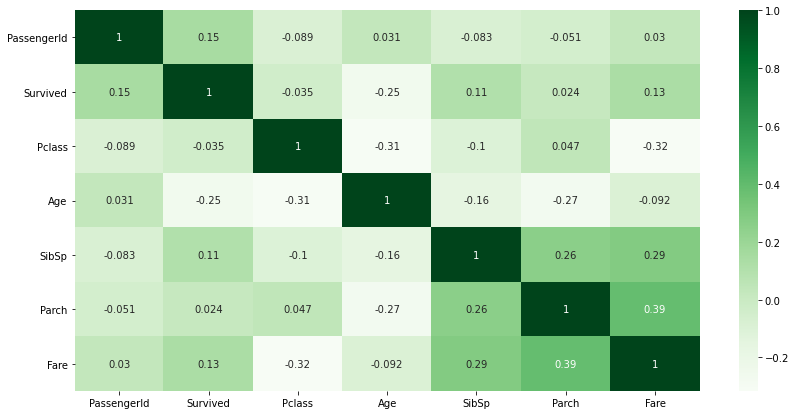

In [11]:
# ploting the heatmap on corelation 
plt.figure(figsize=(14,7))
sns.heatmap(dt.corr(),cmap='Greens',annot=True)

In [12]:
# Seprating the datset with independent and dependent variables and assinging to the x and y variables
x=dt[['Pclass','Age','Fare']]
y=dt['Survived']

In [13]:
# Spliting the dataset in the form train and test, for the purpose of training and testing of the model
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25) 

In [14]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [15]:
# Fitting the logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression() 
classifier.fit(xtrain, ytrain)

LogisticRegression()

In [16]:
# predicting the model
y_pred = classifier.predict(xtest)

In [17]:
# confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 3 15]
 [ 0 28]]


In [18]:
#accuracy of the model
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.6739130434782609
